In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random

from scipy.integrate import quad


In [11]:
def ShowArr(arr ,a,b,prec, name):
  plt.figure(figsize=(14,3))
  plt.title(name)
  axis = np.arange(a,b,prec) 
  plt.plot( axis , arr,'r-')
  plt.grid(True)
  plt.show()

def ShowFourier(arr, name):
  plt.figure(figsize=(14,3))
  plt.title(name)
  axis = [i*1/prec/len(arr) for i in range(len(arr))]
  plt.xlim (0, np.max(axis)/2)
  plt.plot( axis , arr,'r-')
  plt.grid(True)
  plt.show()

In [12]:
def fft(arr):
  return np.fft.fft(arr)
def ifft(arr):
  f = np.fft.ifft(arr)
  tmp = np.split( np.fft.ifft(arr) , 2)  
  return np.concatenate([tmp[1], tmp[0]])

In [137]:
class Array:
  def __init__(self, func , a,b,prec):
    self.func = func
    self.a = a
    self.b = b
    self.prec = prec
    self.arr_range = np.arange(a,b,prec)
    self.arr = np.array([func(x) for x in self.arr_range])  
  def show(self):
    plt.figure(figsize=(14,3))
    plt.plot(  self.arr_range , self.arr,'r-')
    plt.grid(True)
    plt.show()
  def showFourier(self):
    plt.figure(figsize=(14,3))
    axis = [i*1/self.prec/len(self.arr_range) for i in range(len(self.arr_range))]
    plt.xlim (0, np.max(axis)/2)
    plt.plot( axis , np.abs(fft(self.arr)),'r-')
    plt.grid(True)
    plt.show()
  def setPrecision(self, prec):
    fourier = fft(self.arr)

    #коррекция частоты
    if( len(np.arange(self.a,self.b,prec)) %2 == 1):
        prec = 1/ ((len(np.arange(self.a,self.b,prec)) + 1)/(self.b -self.a))

    #увеличение частоты
    if (prec < self.prec):
      add = len(np.arange(self.a,self.b,prec)) - len(fourier)
      fourier = np.insert(fourier, int(len(fourier) /2)  , np.zeros(add))
      self.arr = np.real(ifft(fourier)) 

    #уменьшение частоты
    elif (prec > self.prec):
      add = -1
      i = 2
      while(add<0):
        i+=2
        add = len(np.arange(self.a,self.b,prec/i)) - len(fourier)
      fourier = np.insert(fourier, int(len(fourier) /2)  , np.zeros(add))
      tmp_arr = ifft(fourier)
      arr_new = []
      for x in range(0 , len(tmp_arr), i):
        arr_new.append(tmp_arr[x])
      self.arr = np.real(np.array(arr_new))
    else:
      return

    self.prec = prec
    self.arr_range = np.arange(self.a,self.b,self.prec)


In [18]:
def createArray(func , a , b , prec):
  return np.array([func(x)  for x in np.arange(a,b,prec)])

In [19]:
def cos_sin(a1,a2,w1,w2):
  return lambda x: a1*np.cos(w1*x*np.pi*2) + a2*np.sin(w2*x*np.pi*2)

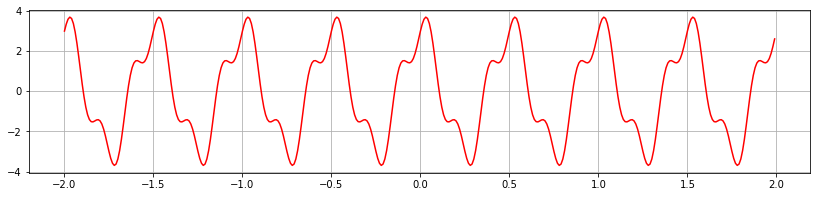

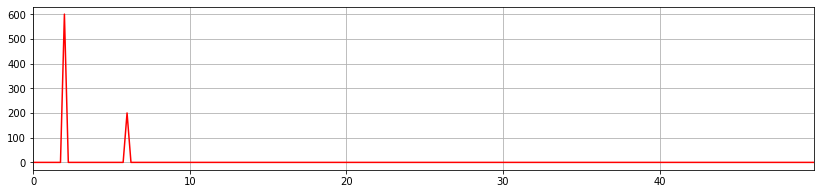

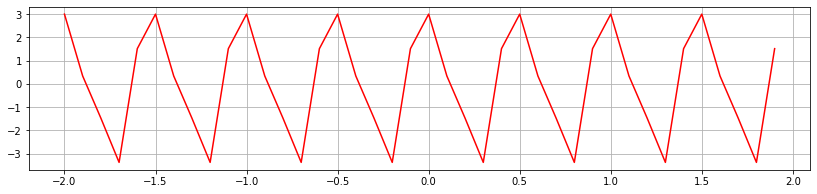

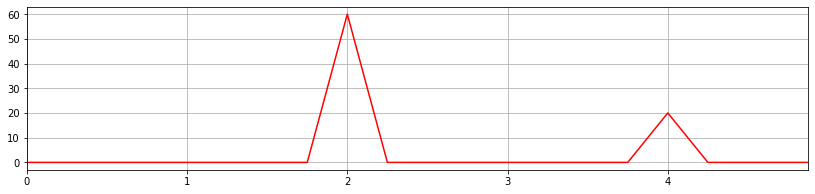

In [146]:
arr = Array(cos_sin(3,1,2,6) , -2 , 2 , 0.01)
arr.show()
arr.showFourier()
arr.setPrecision(0.1)
arr.show()
arr.showFourier()

